# Part I - Prosper Loan Data
## by Thao Ho

## Introduction

The purpose of this project is to explore, analyze, and visualize the data to uncover patterns, trends, and relationships that can provide valuable insights into the lending and borrowing process. By leveraging this dataset, we aim to better understand borrower behaviors, identify factors contributing to loan success or default, and gain insights into the peer-to-peer lending ecosystem.  

> Introduce the dataset

The *Loan Data from Prosper* dataset is a comprehensive collection of information on 113,937 loans facilitated through the Prosper platform. It includes 81 variables that capture key details such as loan amounts, borrower interest rates, income ranges, credit scores, loan statuses, and other financial metrics. These variables provide a rich source of data for analyzing borrower characteristics, loan performance, and credit risk factors. This dataset serves as a valuable resource for exploring trends and patterns in peer-to-peer lending.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

> Note that the collective size of all your files in the current worksapce **must not exceed 1 GB** in total. 


In [2]:
df = pd.read_csv('prosperLoanData.csv')

df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### What is the structure of your dataset?  

The dataset consists of 113,937 rows, where each row represents a loan, and 81 columns, which contain various features related to the loan and the borrower. These features include numerical data, such as loan amounts, borrower rates, and credit scores, as well as categorical data, such as loan status, income range, and borrower occupation. The dataset also contains some missing values across certain columns.  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is/are the main feature(s) of interest in your dataset?  

The main features of interest are the *Loan Status*, *Borrower Rate (or Interest Rate)*, and *Loan Original Amount*. These features are crucial for understanding the outcomes of loans, the cost of borrowing for individuals, and the typical loan sizes offered by Prosper.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?  

Several features can support the investigation into the main features of interest:  

**Objective #1**: Loan Efficiency

In [4]:
# Columns related to Loan Performance
loan_efficiency_columns = [ 
'LoanStatus', 'BorrowerAPR', 'ProsperScore', 'LoanCurrentDaysDelinquent',
'LoanMonthsSinceOrigination', 'CreditScoreRangeLower', 'DebtToIncomeRatio',
'LoanOriginalAmount', 'CreditScoreRangeUpper',
'EmploymentStatus', 'IsBorrowerHomeowner'
]

# Create a DataFrame with only the necessary columns
loan_efficiency_df = df[loan_efficiency_columns]

# Check the size of the data
print("Dataset shape:", loan_efficiency_df.shape)

# View the first 5 rows of the data
print("Dataset preview:", loan_efficiency_df.head())

# Check for null data
print("\nMissing values ​​in each column:", loan_efficiency_df.isnull().sum())

# Statistical description of numeric columns
print("\nStatistical summary of numeric columns:", loan_efficiency_df.describe())

# Loan status distribution
print("\nLoan Status Distribution:", loan_efficiency_df['LoanStatus'].value_counts())


Dataset shape: (113937, 11)
Dataset preview:   LoanStatus  BorrowerAPR  ProsperScore  LoanCurrentDaysDelinquent  \
0  Completed      0.16516           NaN                          0   
1    Current      0.12016           7.0                          0   
2  Completed      0.28269           NaN                          0   
3    Current      0.12528           9.0                          0   
4    Current      0.24614           4.0                          0   

   LoanMonthsSinceOrigination  CreditScoreRangeLower  DebtToIncomeRatio  \
0                          78                  640.0               0.17   
1                           0                  680.0               0.18   
2                          86                  480.0               0.06   
3                          16                  800.0               0.15   
4                           6                  680.0               0.26   

   LoanOriginalAmount  CreditScoreRangeUpper EmploymentStatus  \
0                9

**Objective #2**: Credit Rating and Borrower Evaluation

In [5]:
# Columns related to Credit Rating and Borrower Evaluation
credit_rating_columns = [
    'EmploymentStatus',
    'IsBorrowerHomeowner',
    'CreditScoreRangeLower',
    'CreditScoreRangeUpper',
    'ProsperRating (Alpha)',
    'ProsperRating (numeric)',
    'ProsperScore',
    'BorrowerAPR',
    'LoanOriginalAmount'
]

# Create a DataFrame with only the necessary columns
credit_rating_df = df[credit_rating_columns]

# Check the size of the data
print("Dataset shape:", credit_rating_df.shape)

# View the first 5 rows of the data
print("\nDataset preview:")
print(credit_rating_df.head())

# Check the data null
print("\nMissing values ​​in each column:")
print(credit_rating_df.isnull().sum())

# Statistical description of numeric columns
print("\nStatistical summary of numeric columns:")
print(credit_rating_df.describe())

# Prosper Rating distribution
print("\nProsper Rating Distribution:")
print(credit_rating_df['ProsperRating (Alpha)'].value_counts())

Dataset shape: (113937, 9)

Dataset preview:
  EmploymentStatus  IsBorrowerHomeowner  CreditScoreRangeLower  \
0    Self-employed                 True                  640.0   
1         Employed                False                  680.0   
2    Not available                False                  480.0   
3         Employed                 True                  800.0   
4         Employed                 True                  680.0   

   CreditScoreRangeUpper ProsperRating (Alpha)  ProsperRating (numeric)  \
0                  659.0                   NaN                      NaN   
1                  699.0                     A                      6.0   
2                  499.0                   NaN                      NaN   
3                  819.0                     A                      6.0   
4                  699.0                     D                      3.0   

   ProsperScore  BorrowerAPR  LoanOriginalAmount  
0           NaN      0.16516                9425  
1    

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

> **Rubric Tip**: This part (Univariate Exploration) should include at least one histogram, and either a bar chart of count plot.

>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

**1. Loan Status**

We examined the distribution of loan statuses using a bar chart, where the categories were ordered to include all statuses, such as "Cancelled," "Completed," "FinalPaymentInProgress," "Current," "Past Due," "Chargedoff," and "Defaulted."



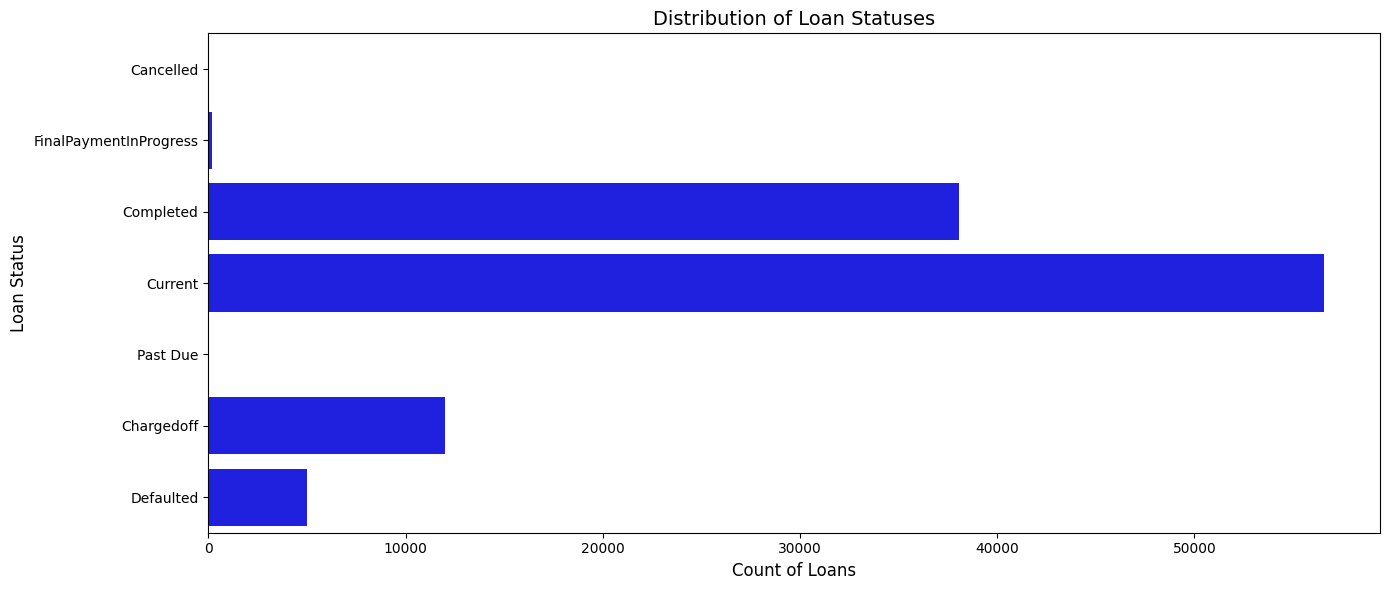

In [6]:
# Define the order of loan statuses for visualization
loan_status = [
    'Cancelled', 
    'FinalPaymentInProgress', 
    'Completed', 
    'Current', 
    'Past Due', 
    'Chargedoff',
    'Defaulted',
]

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 6))  # Create figure and axes with specified size

# Plot the data with Seaborn
sns.countplot(
    data=loan_efficiency_df,  # Source data
    y='LoanStatus',           # Variable to plot
    color='blue',           # Bar color
    order=loan_status,  # Order of categories
    ax=ax                     # Specify axes for the plot
)

# Customize labels and title
ax.set_xlabel('Count of Loans', fontsize=12)  # Label for X-axis
ax.set_ylabel('Loan Status', fontsize=12)     # Label for Y-axis
ax.set_title('Distribution of Loan Statuses', fontsize=14)  # Title of the plot

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Comments:**

The majority of loans are in the `Current` status, numbering 55,000.
Loans marked as `Completed` (about 37,000) represent successful repayments.
Risk-prone categories include Chargedoff (4,444) and `Defaulted` (5,000).
There were no unusual points in this distribution, and no transformations were necessary.


**2. Loan Original Amount**

Next, we explored the distribution of the LoanOriginalAmount variable, focusing on its skewness and peaks.

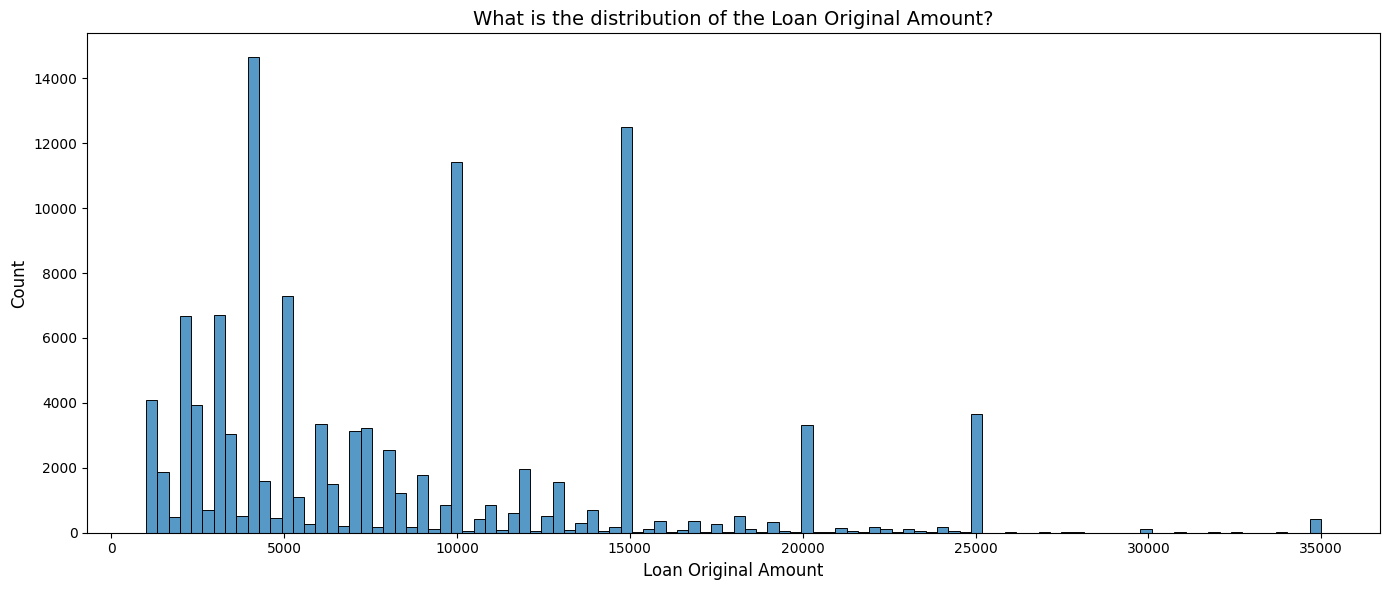

In [7]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 6))  # Create figure and axes with specified size

# Plot the histogram with Seaborn
sns.histplot(
    data=credit_rating_df,  # Data source
    x='LoanOriginalAmount'
)

# Customize the plot
ax.set_title('What is the distribution of the Loan Original Amount?', fontsize=14)  # Add title
ax.set_xlabel('Loan Original Amount', fontsize=12)  # Label for X-axis
ax.set_ylabel('Count', fontsize=12)                 # Label for Y-axis

# Adjust layout and show the plot
plt.tight_layout()  # Ensure layout does not overlap
plt.show()


**Comments:**

The distribution of the `Loan Original Amount` is right-skewed, with most loans concentrated in smaller amounts below $10,000. The histogram reveals multiple peaks, indicating distinct groups of borrowers with varying loan preferences. There are noticeable gaps between certain loan ranges, suggesting specific tiers or thresholds in loan origination practices. Outliers in the higher ranges (above $25,000) are valid values but occur less frequently. No transformations are necessary, as these outliers represent realistic loan amounts.

**3. Borrower APR (Annual Percentage Rate)**

**Reason for selection:** This is a critical variable in financial analysis as it reflects the interest rate that borrowers must pay. Analyzing the distribution of APR will help you understand the average interest rate and its range.

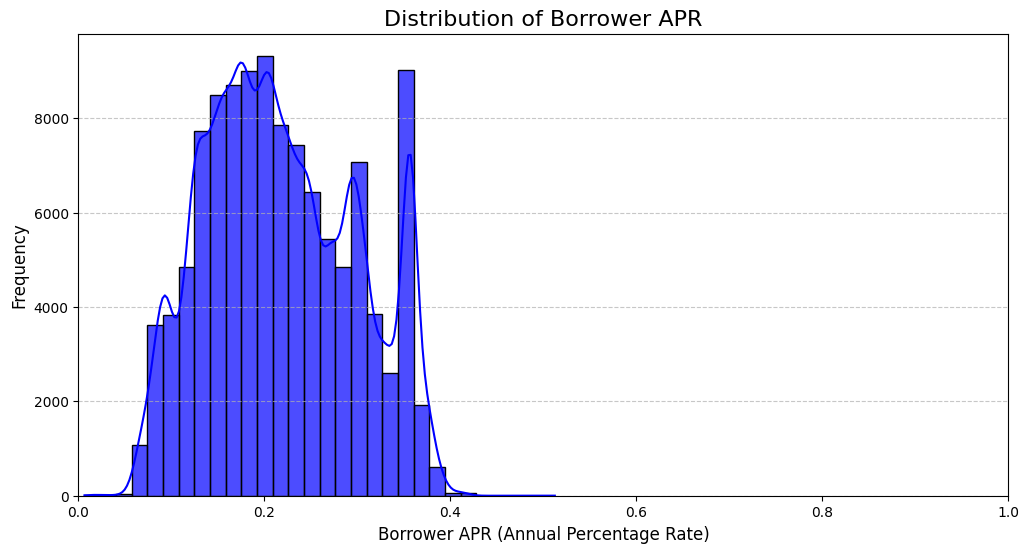

In [10]:
plt.figure(figsize=(12, 6))

# Create an APR distribution plot
sns.histplot(data=loan_efficiency_df, x='BorrowerAPR', bins=30, kde=True, color='blue', alpha=0.7)

# Set title and labels
plt.title('Distribution of Borrower APR', fontsize=16)
plt.xlabel('Borrower APR (Annual Percentage Rate)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set limits if needed, for example to check for outliers
plt.xlim(0, 1) # APR is usually in the range 0-1 (equivalent to 0%-100%)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Comments:**  
Based on the image, we can see the distribution chart of borrowers' APR (Annual Percentage Rate). Here are some highlights:

- **Right-skewed distribution**: Most values are concentrated from 0.1 to 0.4.
- **Distribution peaks**: There are distinct peaks around 0.2 and 0.4, indicating high frequencies for these values.
- **Density line**: The smooth density line follows the shape of the chart, providing a smooth estimate of the distribution.

This information helps understand the common APR values among borrowers, which is useful for financial institutions in assessing loan interest rates and for borrowers to compare their APR with the overall distribution.


**4. Employment Status**

Reason for selection: The employment status of borrowers significantly impacts their ability to repay loans. Analyzing the distribution of this variable will help identify the largest customer group, such as "Employed," "Unemployed," "Retired," or "Student."

C:\Users\Thao Ho\AppData\Local\Temp\ipykernel_9556\3805920914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='EmploymentStatus', order=df['EmploymentStatus'].value_counts().index, palette='viridis')


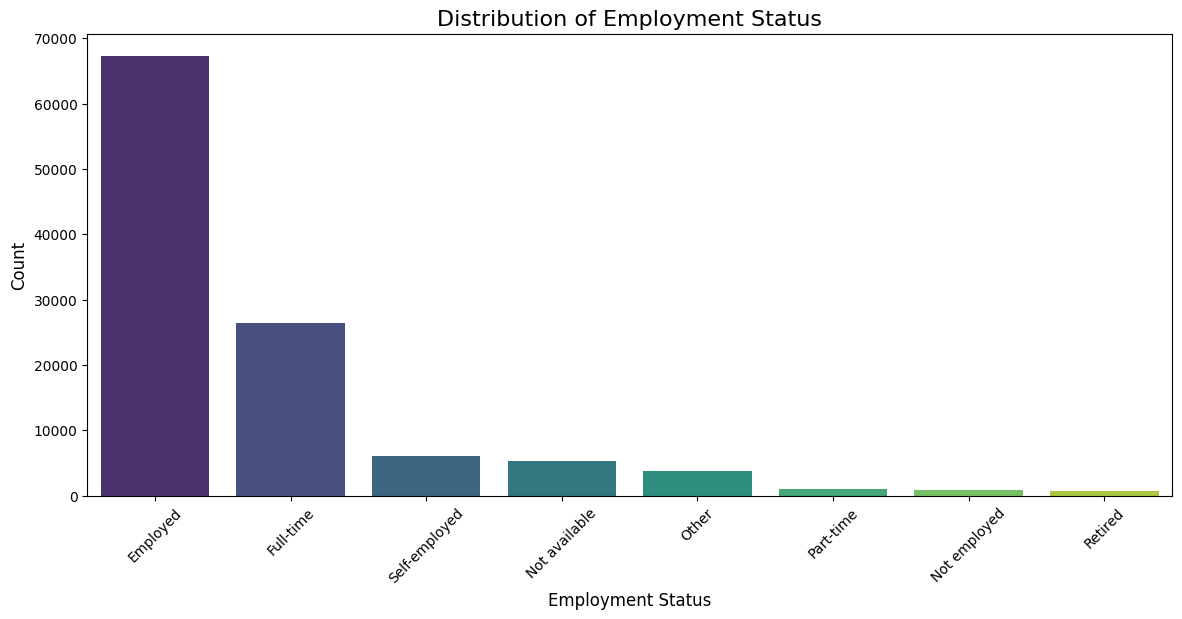

In [17]:
# Create a distribution plot for Employment Status
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='EmploymentStatus', order=df['EmploymentStatus'].value_counts().index, palette='viridis')

# Set labels and titles
plt.title('Distribution of Employment Status', fontsize=16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Comments:**  

Predominance of Employed Individuals: The majority of borrowers, about 70,000, are employed.

Significant Full-Time Employment: "Full-time" employment follows with around 30,000 individuals.

Lower Counts in Other Categories: "Self-employed," "Not available," and "Other" show moderate counts, while "Part-time," "Not employed," and "Retired" have the lowest.

**5. Income Range**     
Reason for Selection: Income is an important factor in assessing the financial capacity of borrowers. Analyzing this variable helps to identify common income groups and examine the differences between groups.

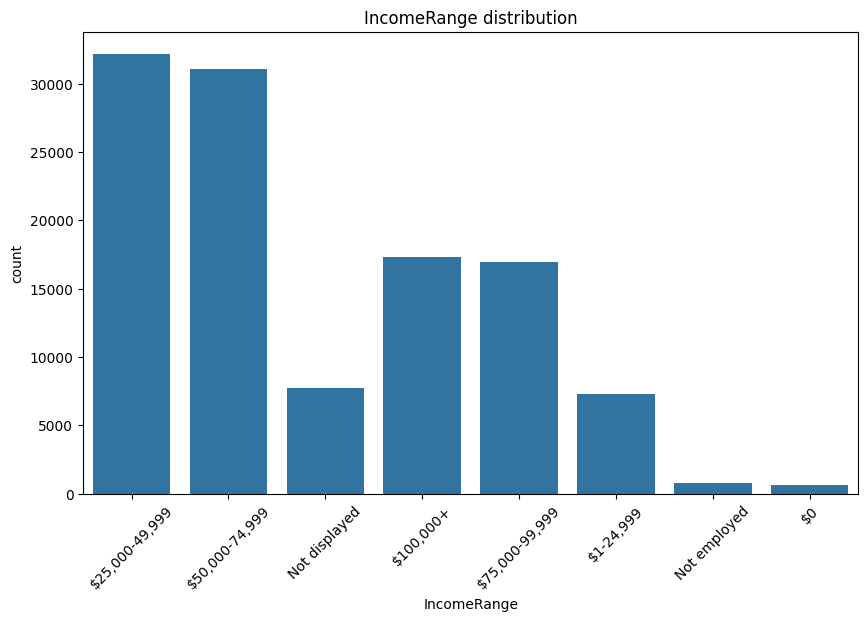

Values in IncomeRange:
IncomeRange
$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: count, dtype: int64
Null values ​​in IncomeRange: 0
Unexpected values in IncomeRange:
                     ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43  

In [42]:
# Plot the distribution for IncomeRange
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='IncomeRange')
plt.title('IncomeRange distribution')
plt.xticks(rotation=45)
plt.show()

# Check for unusual values ​​in column 'IncomeRange'
unexpected_values = df['IncomeRange'].value_counts()
print("Values in IncomeRange:")
print(unexpected_values)

# Check for any NaN or invalid values
invalid_values = df[df['IncomeRange'].isnull()]
print("Null values ​​in IncomeRange:", invalid_values.shape[0])

# If you want to check for invalid values ​​(e.g. quotes or odd values), you can check further
unexpected_values = df[~df['IncomeRange'].isin(['Some expected range values'])] # Replace with valid values
print("Unexpected values in IncomeRange:")
print(unexpected_values)


**Comments:**       
The majority of individuals fall into the middle-income ranges ($25,000-74,999), while higher income ranges ($100,000+) have fewer individuals. A notable number of individuals did not have their income displayed, or reported very low or zero income. This distribution provides insight into the economic standing of the population being studied, helping identify the largest customer group and understand income disparities.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

> **Rubric Tip**: This part (Bivariate Exploration) should include at least one scatter plot, one box plot, and at least one clustered bar chart or heat map.

**Question (1)**: What notable relationships exist between the variables in the dataset?

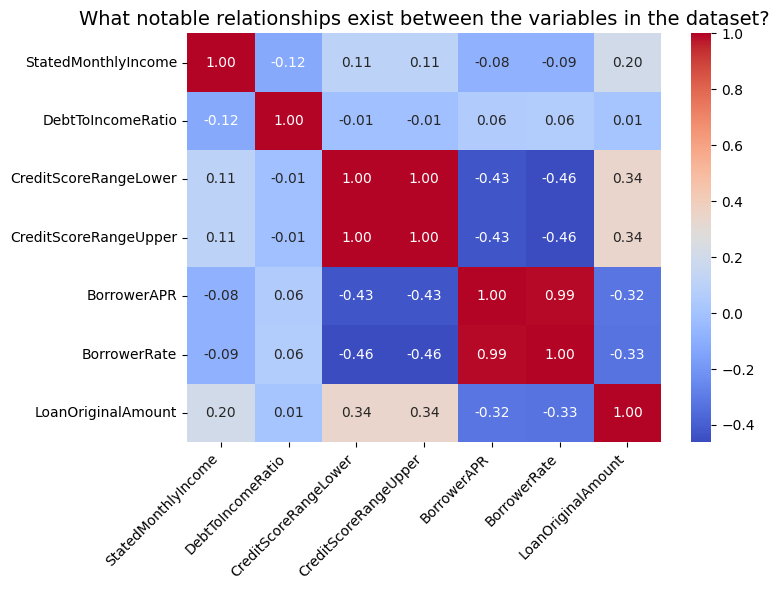

In [43]:
# Define the variables of interest
variables_of_interest = [
    'StatedMonthlyIncome', 
    'DebtToIncomeRatio', 
    'CreditScoreRangeLower', 
    'CreditScoreRangeUpper', 
    'BorrowerAPR', 
    'BorrowerRate', 
    'LoanOriginalAmount'
]

# Extract the subset of data
data_subset = df[variables_of_interest]

# Compute the correlation matrix
correlation_matrix = data_subset.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Optional: Set figure size for better readability
sns.heatmap(
    correlation_matrix,    # Correlation matrix
    annot=True,            # Display correlation coefficients
    cmap="coolwarm",       # Use a color palette for better contrast
    fmt=".2f"              # Format the numbers to two decimal places
)

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.title("What notable relationships exist between the variables in the dataset?", fontsize=14)  # Add a title with font size
plt.tight_layout()                   # Adjust layout to prevent overlap

# Display the plot
plt.show()

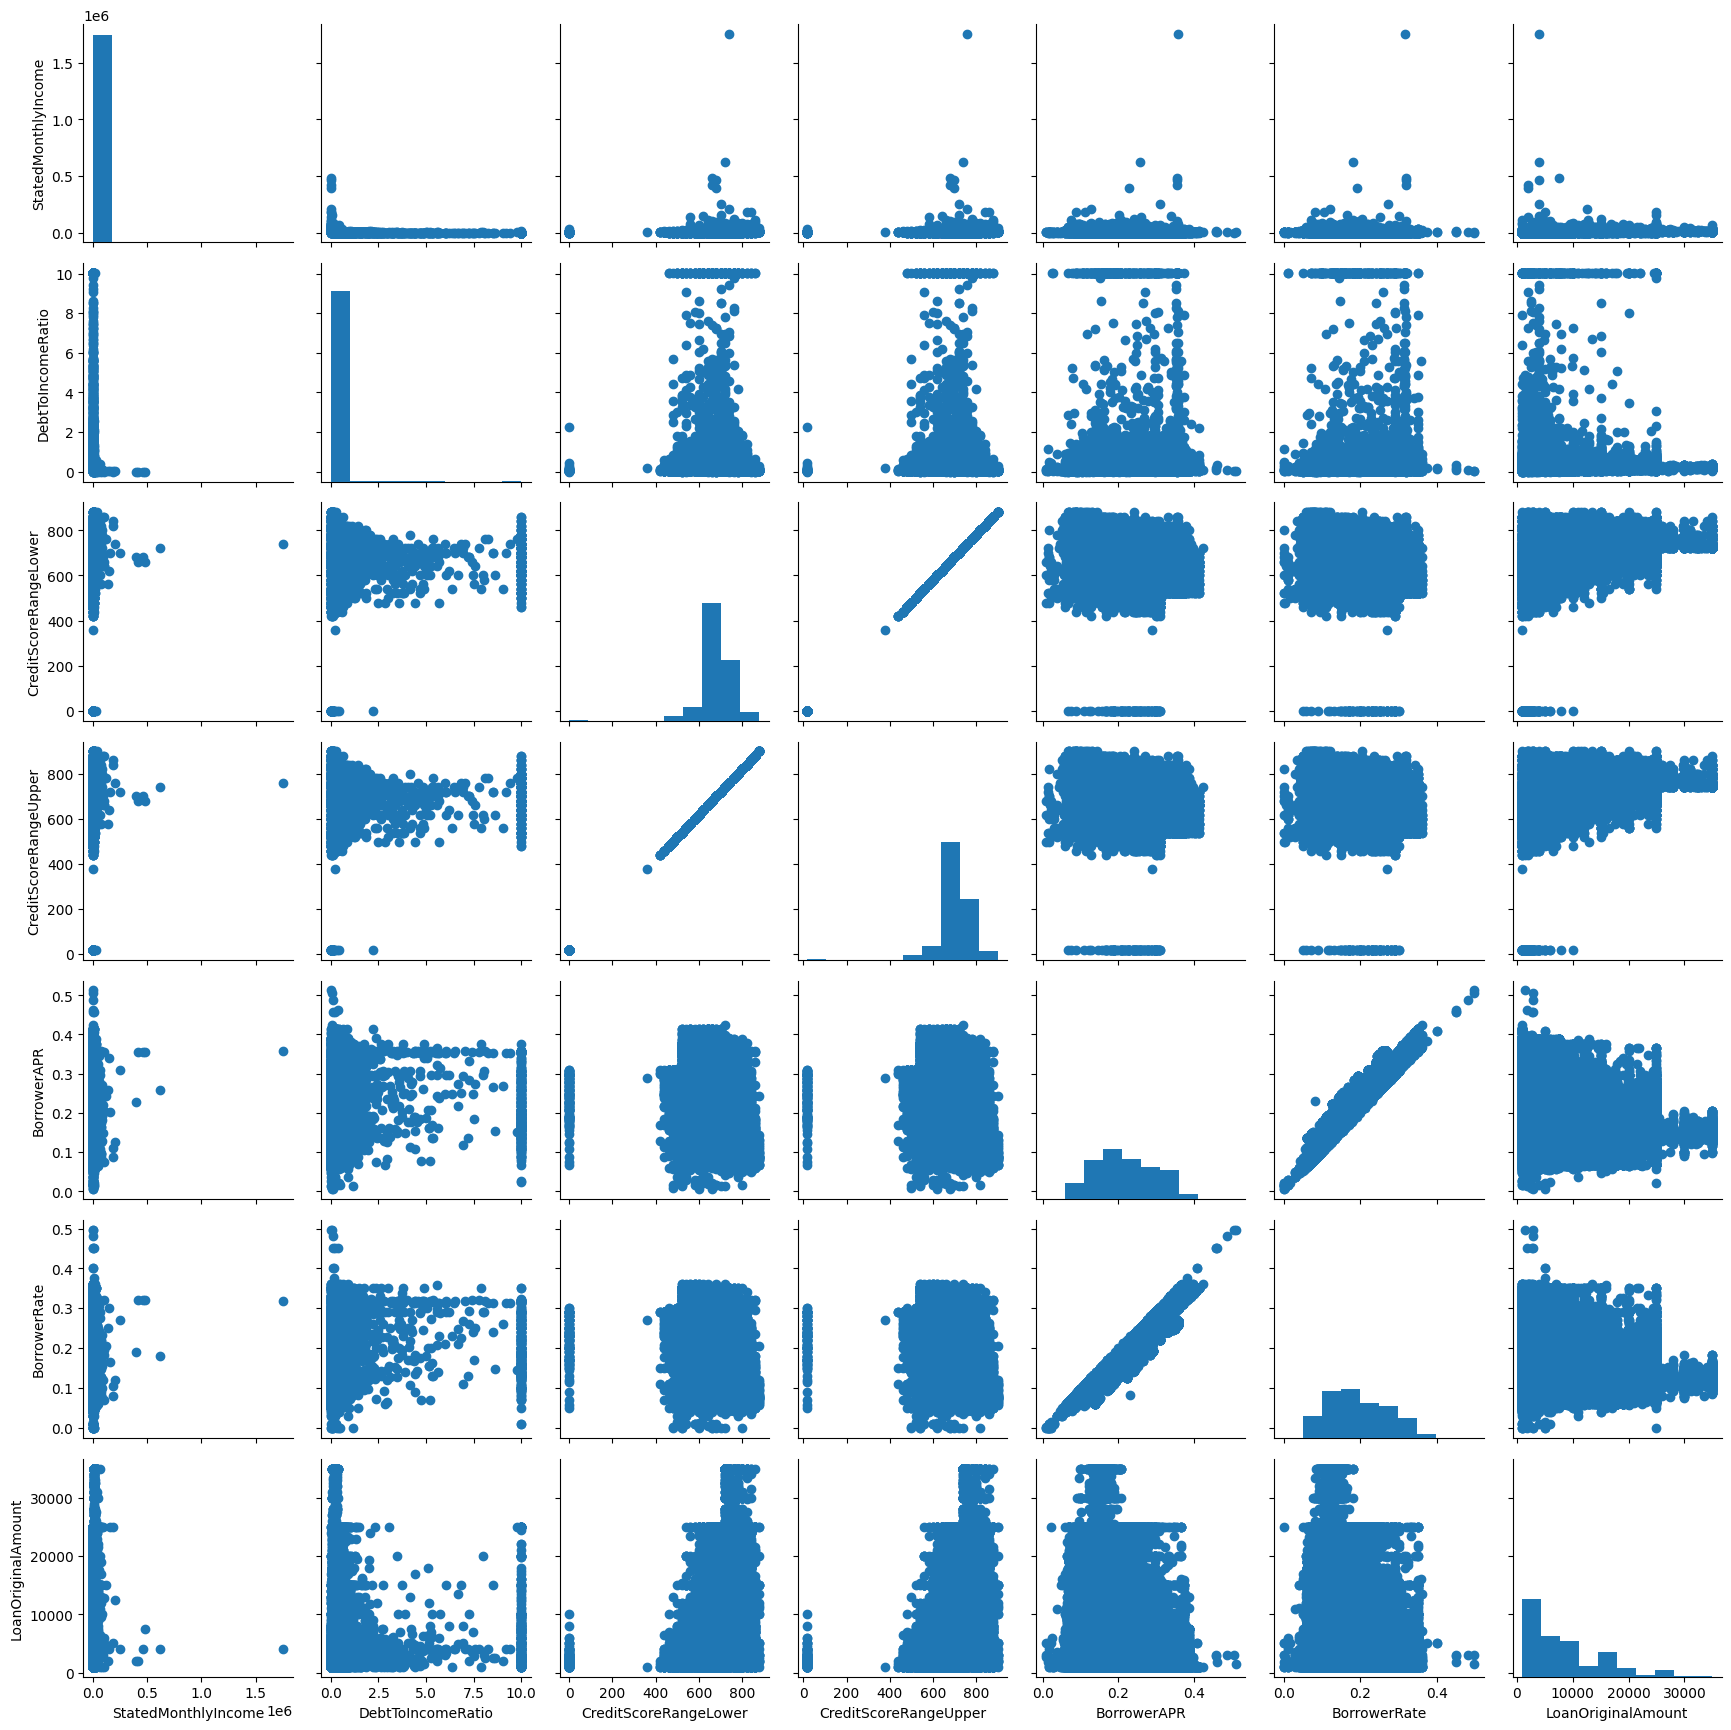

In [68]:
# Create a PairGrid to visualize relationships between variables
pair_grid = sns.PairGrid(data=df, vars=variables_of_interest)

# Map a histogram to the diagonal plots with custom styling
pair_grid.map_diag(plt.hist, bins=10)

# Map scatter plots to the off-diagonal plots with consistent color
pair_grid.map_offdiag(plt.scatter)

# Display the grid
plt.show()

**commnet:** Based on two above figures, there are notable relationships between the variables in the dataset:

- `BorrowerAPR and BorrowerRate`: There is a very high positive correlation (0.99), meaning they increase together almost proportionally.
- `CreditScoreRangeLower and CreditScoreRangeUpper`: Also have a very high positive correlation (0.99), indicating that the lower and upper credit scores move in tandem.
- `LoanOriginalAmount with CreditScoreRangeLower/Upper`: Both `CreditScoreRangeLower` and `CreditScoreRangeUpper` have a moderate positive correlation with LoanOriginalAmount (0.34), suggesting that higher credit scores are associated with larger loan amounts.
- `DebtToIncomeRatio and StatedMonthlyIncome`: Show a slight negative correlation (-0.12), implying that higher stated monthly incomes are linked to lower debt-to-income ratios.
- `BorrowerAPR/BorrowerRate` with `CreditScoreRangeLower/Upper`: `BorrowerAPR` and `BorrowerRate` have moderate negative correlations with `CreditScoreRangeLower` and `CreditScoreRangeUpper` (around -0.46), indicating that higher credit scores correspond to lower APR and interest rates.

These relationships help in understanding the interaction between financial variables, which can aid in risk assessment, loan approval, and financial planning.

**Question (2)**: Is there anything unusual about the original loan amount across different loan statuses?  

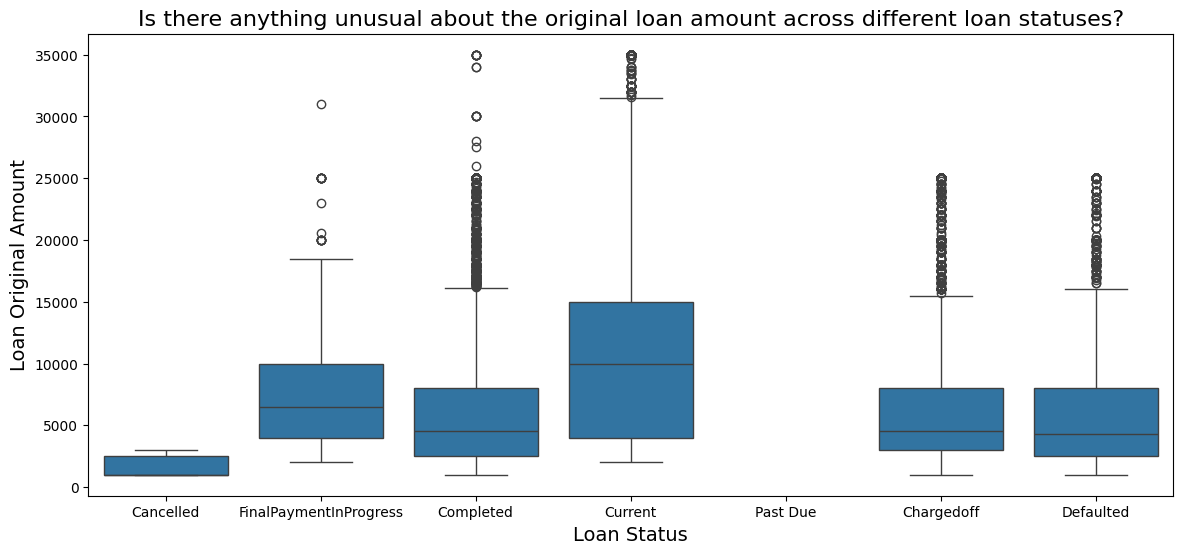

In [78]:
# Create a boxplot with the appropriate size
fig, ax = plt.subplots(figsize=(14, 6))

# Draw a boxplot with the specified parameters
sns.boxplot(
data=loan_efficiency_df, # Source data
x='LoanStatus', # Variables on the x-axis
y='LoanOriginalAmount', # Variables on the y-axis
order=loan_status # Sort loan statuses
)

# Set the title and labels for the axes
ax.set_title('Is there anything unusual about the original loan amount across different loan statuses?', fontsize=16)
ax.set_xlabel('Loan Status', fontsize=14)
ax.set_ylabel('Loan Original Amount', fontsize=14)

# Display the chart
plt.show()

**Finding:** The box plot in the image indicates that there are significant variations in the original loan amounts across different loan statuses:

- `Cancelled`: The loan amounts are uniformly low and show little variation, with no outliers.
- `FinalPaymentInProgress`: The loan amounts span a wider range and include some outliers.
- `Completed`: This category displays a wide range of loan amounts with numerous outliers.
- `Current`: This status has the widest range of loan amounts and a large number of outliers.
- `Past Due`: Loan amounts here show a moderate range with fewer outliers.
- `Chargedoff`: The loan amounts have a moderate range but include many outliers.
- `Defaulted`: Similar to "Chargedoff," it shows a moderate range and many outliers.

In conclusion, the original loan amounts vary widely, especially for "Current," "Completed," and "FinalPaymentInProgress" statuses, indicating greater variability and higher occurrence of outliers compared to other statuses.

**Question (3)**: Does the presence of investors influence monthly loan payments?  

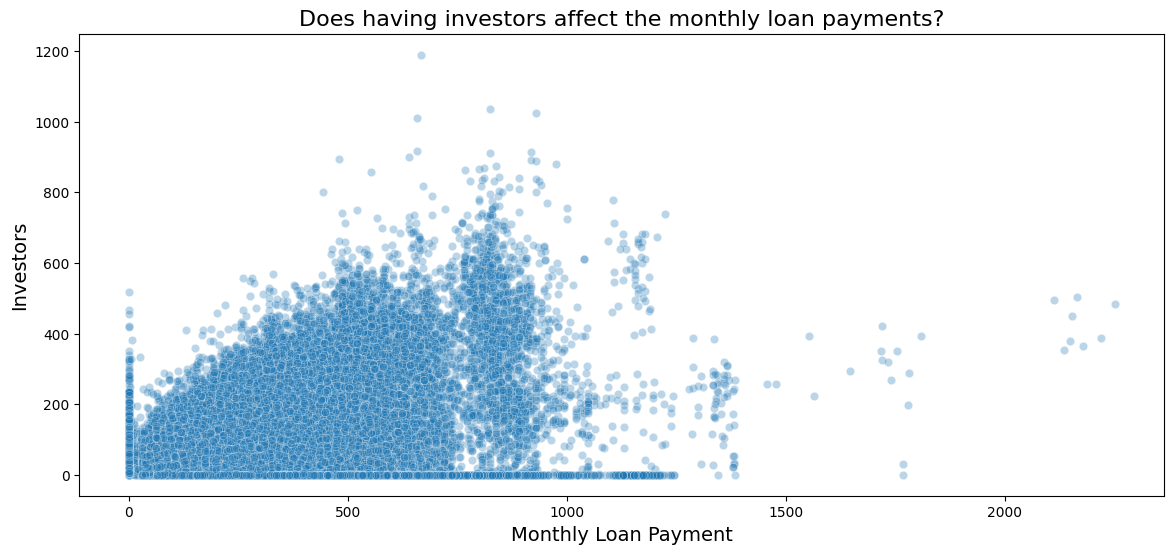

In [79]:
# Create a scatterplot with the appropriate size
fig, ax = plt.subplots(figsize=(14, 6))

# Plot a scatterplot with the specified parameters
sns.scatterplot(
data=df, # Source data
x='MonthlyLoanPayment', # Variables on the x-axis
y='Investors', # Variables on the y-axis
alpha=0.3 # Transparency of the points
)

# Set the title and labels for the axes
ax.set_title('Does having investors affect the monthly loan payments?', fontsize=16)
ax.set_xlabel('Monthly Loan Payment', fontsize=14)
ax.set_ylabel('Investors', fontsize=14)

# Display the plot
plt.show()

**Finding:** The scatter plot examines the relationship between the number of investors and the monthly loan payment. It shows a dense cluster of data points for monthly loan payments below 1000, with a wide range of investors (0 to over 1000). As monthly loan payments exceed 1000, the number of investors appears to decrease, with fewer data points and a lower range of investors.

In short, higher monthly loan payments might correlate with fewer investors. However, a detailed statistical analysis is needed to confirm this relationship definitively.

**Question (4)**: Are there any unusual patterns in the lower range of credit scores for different employment statuses?  

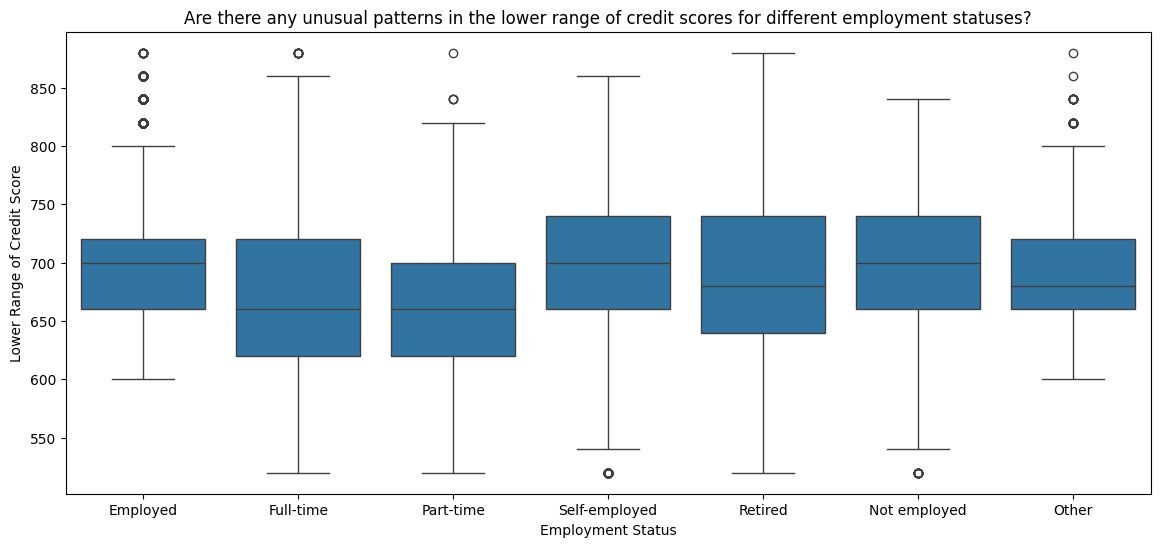

In [80]:
# Sorted employment status list
employment_status = [
    'Employed', 'Full-time', 'Part-time', 'Self-employed', 
    'Retired', 'Not employed', 'Other'
]

# Create a boxplot with a suitable figure size
plt.figure(figsize=(14, 6))

# Plot boxplot with the specified data, categories, and color
sns.boxplot(
    data=credit_rating_df,              # Data source
    x='EmploymentStatus',                  # Variable on the x-axis
    y='CreditScoreRangeLower',             # Variable on the y-axis
    order=employment_status         # Specify the order of employment statuses
)

# Add a title and labels for axes
plt.title('Are there any unusual patterns in the lower range of credit scores for different employment statuses?')
plt.xlabel('Employment Status')
plt.ylabel('Lower Range of Credit Score')

# Display the plot
plt.show()

**Finding:** The box plot reveals some intriguing patterns in the lower range of credit scores across different employment statuses:

- `Part-time, Self-employed, Retired, and Not employed` statuses all have lower whiskers extending to around 550. This indicates that these groups tend to have lower credit scores compared to others.
- `Employed, Full-time, and Other` statuses have lower whiskers around 600. These groups appear to maintain higher credit scores on the lower end.

In conclusion, individuals with `part-time`, `self-employed`, `retired`, and `not employed` statuses tend to have lower credit scores compared to those who are employed, full-time, or classified as 'other'. This could reflect differences in financial stability or creditworthiness across employment statuses.

**Question (5)**:  In what ways does the original loan amount vary over time? 

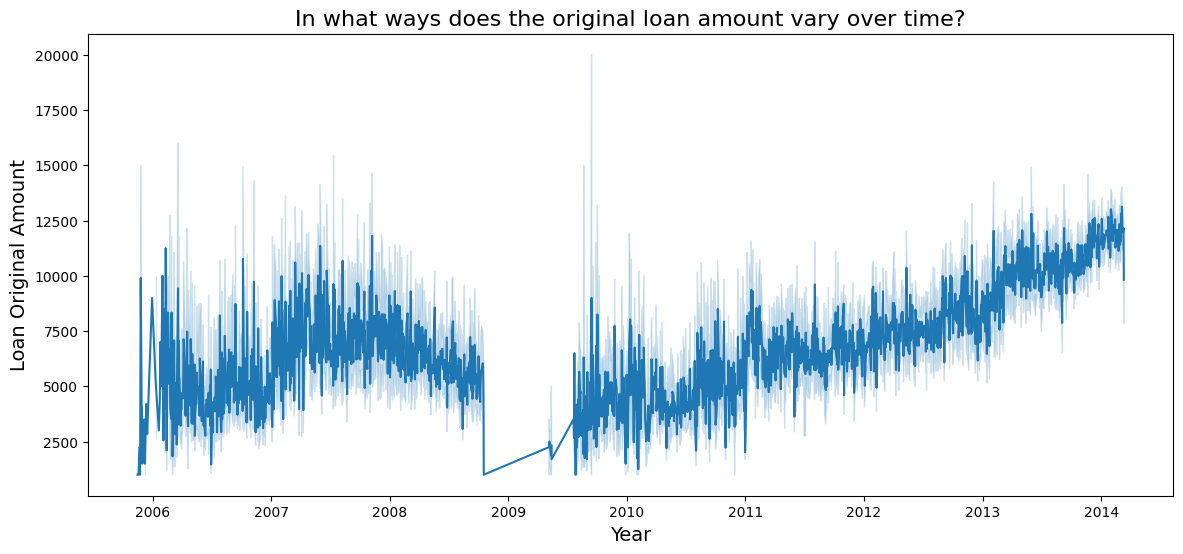

In [81]:
# Create a figure and axis object with a suitable figure size
fig, ax = plt.subplots(figsize=(14, 6))

# Ensure that the LoanOriginationDate is in datetime format
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

# Plot a line chart with specified data, x and y variables, and color
sns.lineplot(
    data=df,                        # Data source
    x='LoanOriginationDate',         # Variable on the x-axis (date)
    y='LoanOriginalAmount'          # Variable on the y-axis (amount)
)

# Set labels for the axes
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Loan Original Amount', fontsize=14)

# Add a title to the plot
ax.set_title('In what ways does the original loan amount vary over time?', fontsize=16)

# Show the plot
plt.show()


**Question (6)**: What types of employment statuses do students with loans have?  

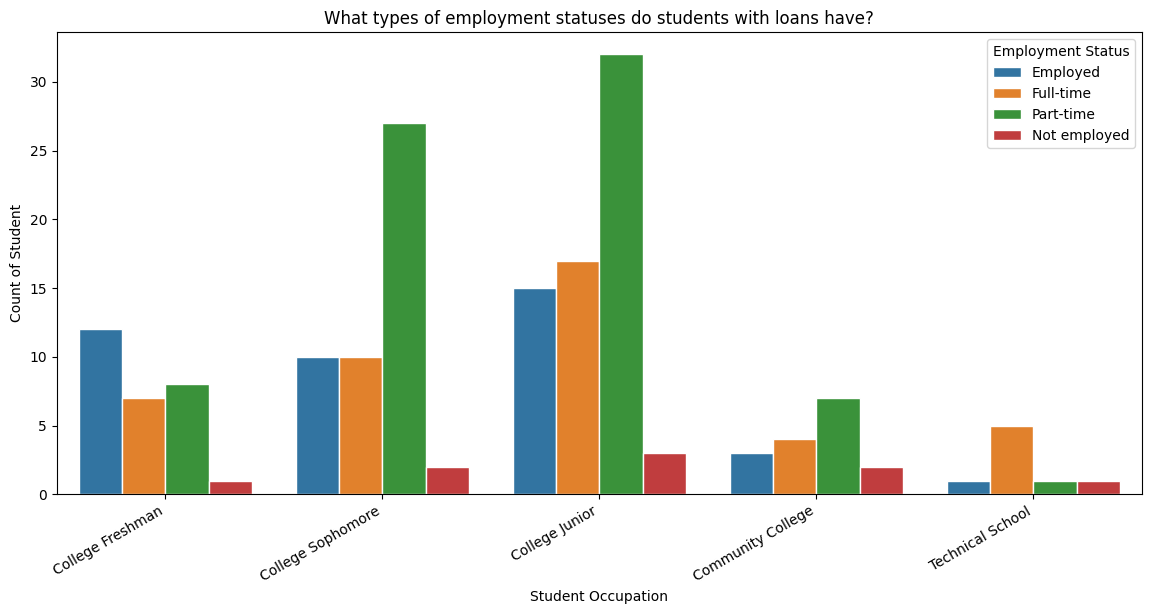

In [62]:
employment_columns = [ 
    'Occupation', 
    'EmploymentStatus',
    'LoanOriginalAmount']

employment_df = df[employment_columns]

# Define a sorted list of student occupations in a logical order
student_occupations = [
    'Student - College Freshman',
    'Student - College Sophomore',
    'Student - College Junior',
    'Student - Community College',
    'Student - Technical School'
]

# Define corresponding labels for visualization
occupation_labels = [
    'College Freshman', 
    'College Sophomore', 
    'College Junior', 
    'Community College', 
    'Technical School'
]

# Define a logical order for employment statuses
employment_status_order = ['Employed', 'Full-time', 'Part-time', 'Not employed']

# Filter the data for only relevant occupations and create the plot
plt.figure(figsize=(14, 6))
sns.countplot(
    data=employment_df[employment_df['Occupation'].isin(student_occupations)],
    x='Occupation', 
    hue='EmploymentStatus',
    hue_order=employment_status_order, 
    order=student_occupations,
    edgecolor='white' # Add borders to bars for better visualization
)

# Set the plot title and labels
plt.title('What types of employment statuses do students with loans have?')
plt.xlabel('Student Occupation')
plt.ylabel('Count of Student')

# Update x-axis tick labels for better readability
plt.xticks(ticks=range(len(occupation_labels)), labels=occupation_labels, rotation=30, ha='right')

# Add a legend with a title
plt.legend(title='Employment Status')

# Show the plot
plt.show()

##  Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Tip**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Tip**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

**Question**: How is the original loan amount connected to the borrower's APR across various loan statuses?

This question is both comprehensive and provides the most valuable insights for analyzing financial performance and loan risks.

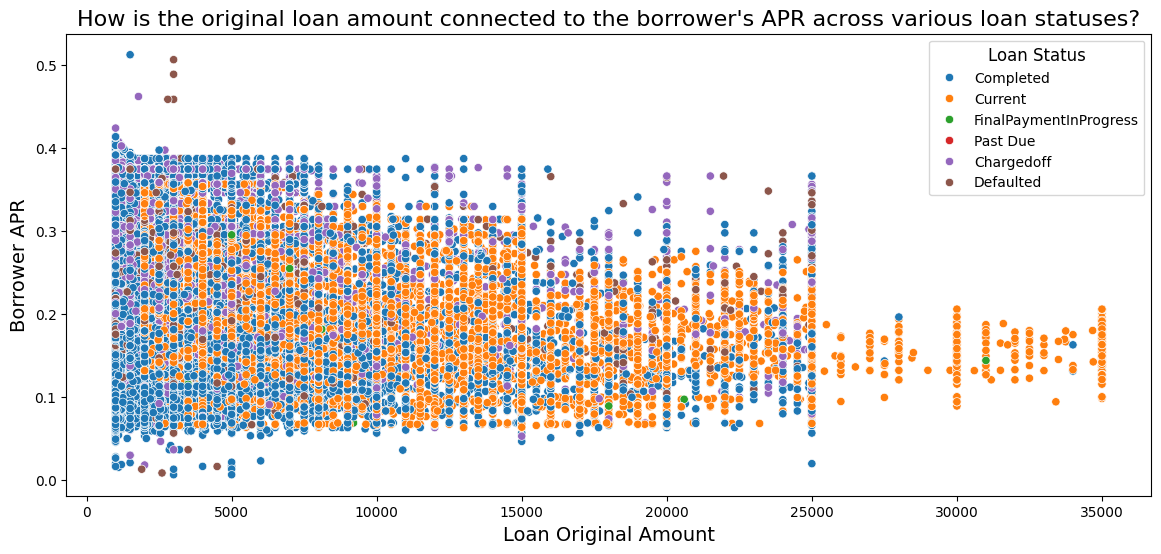

In [83]:
# Create a scatterplot with multiple encodings
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=df,
    x='LoanOriginalAmount',
    y='BorrowerAPR',
    hue='LoanStatus',
    hue_order=loan_status
)

# Add plot title and axis labels
plt.title('How is the original loan amount connected to the borrower\'s APR across various loan statuses?', fontsize=16)
plt.xlabel('Loan Original Amount', fontsize=14)
plt.ylabel('Borrower APR', fontsize=14)

# Customize legend
plt.legend(
    title='Loan Status',
    loc='upper right',
    fontsize=10,
    title_fontsize=12
)

# Display the plot
plt.show()


**Finding:** The scatter plot visually demonstrates the relationship between the original loan amount and the borrower's APR across various loan statuses, revealing significant insights for financial performance and loan risk analysis:

- `Cancelled Loans`: These loans tend to have lower APRs and smaller loan amounts.
- `FinalPaymentInProgress`: This status shows a mix of loan amounts and APRs, indicating varied borrower profiles.
- `Completed Loans`: This group includes a wide range of loan amounts and APRs, suggesting diverse borrowing terms.
- `Current Loans`: There is a noticeable spread in loan amounts and APRs, reflecting different credit conditions and borrower agreements.
- `Past Due Loans`: These loans show moderate loan amounts and slightly higher APRs, hinting at increased risk.
- `Chargedoff and Defaulted Loans`: These statuses display higher APRs and various loan amounts, highlighting elevated risk and financial stress.

In summary, loan status plays a crucial role in determining the relationship between the original loan amount and the borrower's APR, with riskier loans often featuring higher APRs. This relationship is essential for lenders to assess financial performance and loan risks effectively.

**Question**: How does the loan status relate to the borrower’s income range and loan term?     
The question helps you examine the relationship between loan status (LoanStatus), the borrower's income range (IncomeRange), and the loan term (LoanTerm). Do longer-term loans tend to be associated with borrowers who have higher incomes?

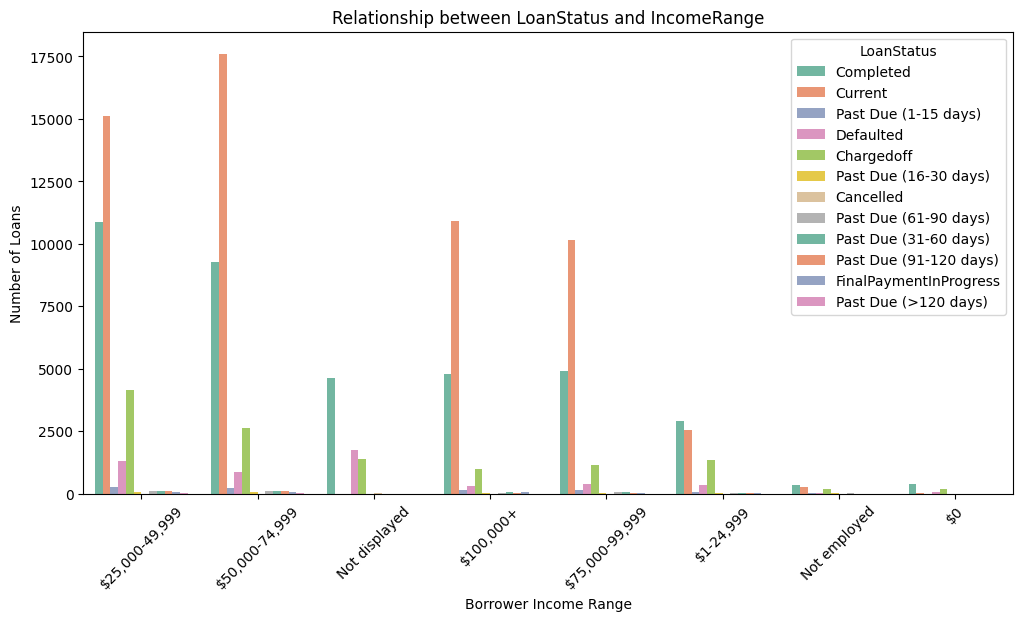

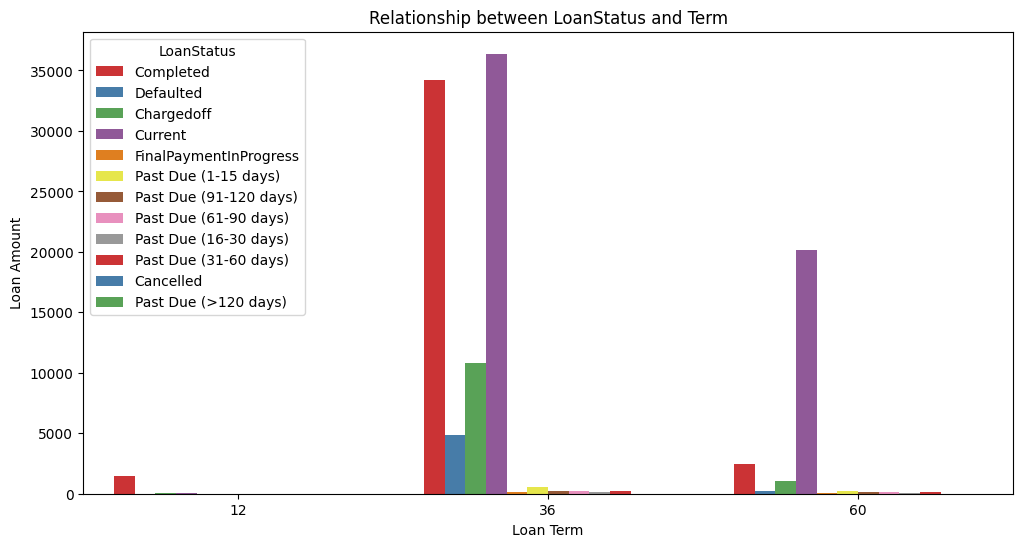

Analysis table of the relationship between LoanStatus, IncomeRange and Term:
Term               12       36      60
IncomeRange                           
$0                NaN    617.0     4.0
$1-24,999        77.0   6409.0   788.0
$100,000+       387.0  12150.0  4800.0
$25,000-49,999  381.0  25485.0  6326.0
$50,000-74,999  432.0  22682.0  7936.0
$75,000-99,999  311.0  12028.0  4577.0
Not displayed     NaN   7741.0     NaN
Not employed     26.0    666.0   114.0

Percentage of LoanStatus by IncomeRange and Term:
Term                  12          36         60
IncomeRange                                    
$0                   NaN   99.355878   0.644122
$1-24,999       1.058565   88.108331  10.833104
$100,000+       2.232220   70.081329  27.686451
$25,000-49,999  1.183524   79.165631  19.650845
$50,000-74,999  1.391304   73.049919  25.558776
$75,000-99,999  1.838496   71.104280  27.057224
Not displayed        NaN  100.000000        NaN
Not employed    3.225806   82.630273  14.143921


In [43]:
# Check data with required columns
df = df[['LoanStatus', 'IncomeRange', 'Term']]

# Draw a distribution plot to check the relationship between LoanStatus, IncomeRange and Term
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='IncomeRange', hue='LoanStatus', palette='Set2')
plt.title('Relationship between LoanStatus and IncomeRange')
plt.xlabel('Borrower Income Range')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.show()

# Draw a distribution plot between Term and LoanStatus
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Term', hue='LoanStatus', palette='Set1')
plt.title('Relationship between LoanStatus and Term')
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount')
plt.show()

# Check the relationship between LoanStatus, IncomeRange and Term using Pivot Table
pivot_table = df.pivot_table(index='IncomeRange', columns='Term', values='LoanStatus', aggfunc='count')
print("Analysis table of the relationship between LoanStatus, IncomeRange and Term:")
print(pivot_table)

# If needed, calculate the percentage of loans in each group
pivot_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
print("\nPercentage of LoanStatus by IncomeRange and Term:")
print(pivot_percentage)

**Comments:**   
Borrowers in mid-income ranges with longer loan terms (36 and 60 months) are more likely to have "Completed" or "Current" loans, suggesting lower risk and better repayment behavior. Conversely, lower income borrowers and shorter-term loans (12 months) tend to have higher risks, indicated by more defaults and past-due loans. This information is crucial for lenders to assess loan performance based on borrower income and term length.

**Question**: How does the debt-to-income ratio affect the borrower’s loan performance (e.g., delinquency or on-time payments)?

This question examines the impact of the debt-to-income ratio (DebtToIncomeRatio) on the borrower’s loan performance (e.g., ability to repay loans on time or bad debts). Does a high debt ratio lead to more difficulty in obtaining loans or higher default rates?

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

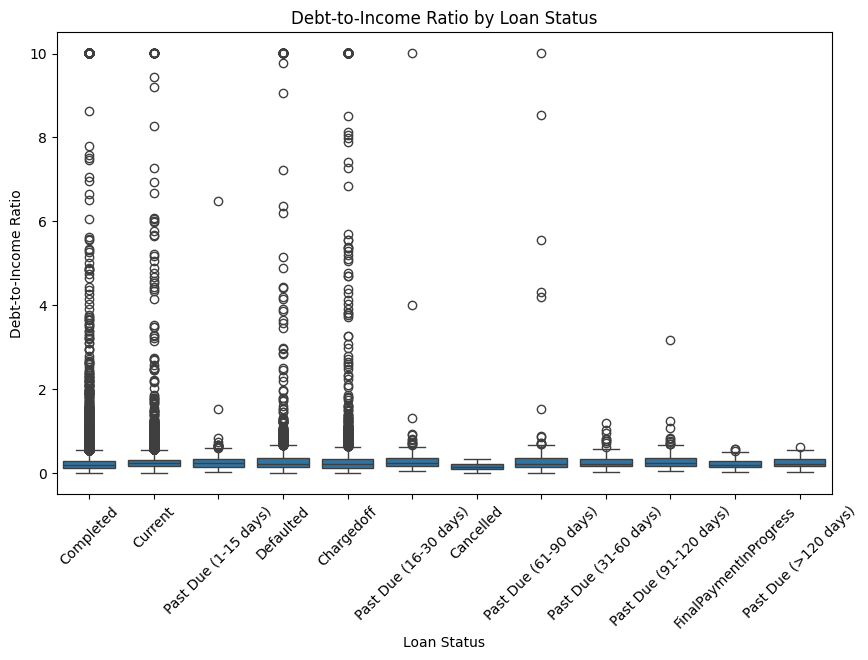

C:\Users\Thao Ho\AppData\Local\Temp\ipykernel_9556\3970872359.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['LoanStatus_encoded'] = df_filtered['LoanStatus'].map({'Current': 1, 'ChargedOff': 0})


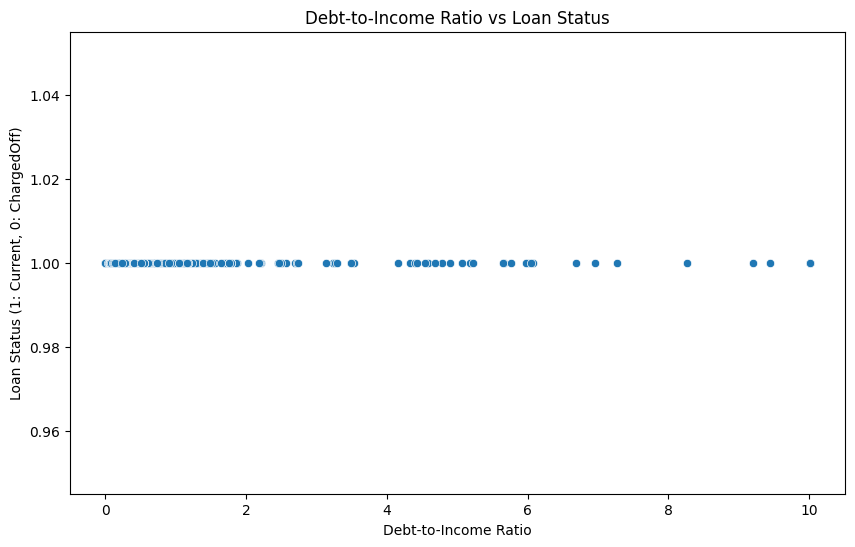

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from CSV file
df = pd.read_csv("prosperLoanData.csv")

# Check available columns in dataframe
print(df.columns)

# Filter columns related to DebtToIncomeRatio and LoanStatus
# Assuming "LoanStatus" is the loan status (e.g. 'Current', 'ChargedOff')
# Check data contains DebtToIncomeRatio and LoanStatus
df_filtered = df[['DebtToIncomeRatio', 'LoanStatus']]

# Draw a boxplot to check the distribution of DebtToIncomeRatio according to LoanStatus
plt.figure(figsize=(10,6))
sns.boxplot(x='LoanStatus', y='DebtToIncomeRatio', data=df_filtered)
plt.title('Debt-to-Income Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.xticks(rotation=45)
plt.show()

# Draw a scatter plot to test the relationship between DebtToIncomeRatio and LoanStatus
# Assuming LoanStatus has been encoded into numeric values ​​(0 for bad debt, 1 for on-time payment)
# If LoanStatus are text statuses, you can use label encoding
df_filtered['LoanStatus_encoded'] = df_filtered['LoanStatus'].map({'Current': 1, 'ChargedOff': 0})

# Draw a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='DebtToIncomeRatio', y='LoanStatus_encoded', data=df_filtered)
plt.title('Debt-to-Income Ratio vs Loan Status')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Loan Status (1: Current, 0: ChargedOff)')
plt.show()

**Comment:** 
- Visuallizion 1: Debt-to-Income Ratio by Loan Status:

Higher Debt-to-Income Ratio: Associated with "Defaulted" and "Chargeoff" loans, indicating that borrowers with higher debt burdens relative to their income are more likely to experience difficulties in loan repayment.

Lower Ratios: Correlate with "Completed" and "Current" loans, suggesting better loan performance and on-time payments.

- Visuallizion 2: Debt-to-Income Ratio vs Loan Status:

Clustering of Current Loans: Most loans remain current regardless of the Debt-to-Income Ratio, indicating other factors might influence loan performance more significantly.

Variation in Debt-to-Income Ratios: While there is a range of Debt-to-Income Ratios, this variation does not show a strong direct impact on whether a loan is current or charged off.

- Conclusion:
A higher Debt-to-Income Ratio generally indicates a higher risk of loan delinquency or default, as seen in the "Defaulted" and "Chargeoff" categories. However, the majority of loans remain current across various Debt-to-Income Ratios, suggesting that other factors also play a crucial role in loan performance. This information is vital for lenders to assess the borrower's ability to repay loans and manage risk effectively.